<a href="https://colab.research.google.com/github/sam-umair/image_classify/blob/main/Cats_and_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cats and Dogs Classification

In [13]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O /content/drive/MyDrive/CND/cats_dog_classification.zip

--2024-12-28 15:47:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/drive/MyDrive/CND/cats_dog_classification.zip’

/content/drive/MyDr 100%[===================>]  65.43M  41.9MB/s    in 1.6s    

2024-12-28 15:47:10 (41.9 MB/s) - ‘/content/drive/MyDrive/CND/cats_dog_classification.zip’ saved [68606236/68606236]



In [14]:
import zipfile

local_zip = '/content/drive/MyDrive/CND/cats_dog_classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/CND')
zip_ref.close()

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

train_dir = '/content/drive/MyDrive/CND/cats_and_dogs_filtered/train'
val_dir = '/content/drive/MyDrive/CND/cats_and_dogs_filtered/validation'


In [16]:
#Preprocessing the image: Rescale pixel values(0-255) to the range (0-1)

train_datagen = ImageDataGenerator(rescale=1.0/255) # Normalize training images
val_datagen = ImageDataGenerator(rescale=1.0/255) #Normalize validation images


In [18]:
# Load and Preprocess imges from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,                            #Path the training image
    target_size=(150, 150),               #Resize all images to 150x150 pixels
    batch_size=32,                        #Process image in batches of 32
    class_mode='binary'                   #Binary classification (cats vs. dogs)
)

val_generator = val_datagen.flow_from_directory(
    val_dir,                              #Path the validation image
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
# Build The Convolutional Neural Network (CNN) model
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),                     # Flatten layer
    layers.Dense(128,activation='relu'),  #Fully connected layer
    layers.Dense(1,activation='sigmoid')  # Output layer with 1 unit
])


In [20]:
#Compile the Model
model.compile(
    optimizer='adam',                 # Use Adam optimizer for training
    loss='binary_crossentropy',       # Binary cross-entropy for loss calculation
    metrics=['accuracy']              # Track accuracy during training
)


In [21]:
# Train the model
history = model.fit(
    train_generator,                         # Training data
    steps_per_epoch=len(train_generator),    # Number of batches per epoch
    epochs=10,                               # Train for 10 epochs
    validation_data=val_generator,           # Validation data
    validation_steps=len(val_generator)      # Number of validation batches per epoch
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.5292 - loss: 0.8533 - val_accuracy: 0.5970 - val_loss: 0.6849
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.5562 - loss: 0.6802 - val_accuracy: 0.6340 - val_loss: 0.6518
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.6575 - loss: 0.6157 - val_accuracy: 0.6730 - val_loss: 0.6100
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.7109 - loss: 0.5536 - val_accuracy: 0.7250 - val_loss: 0.5597
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 250us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.7688 - loss: 0.4624 - val_accuracy: 0.7170 - val_lo

In [26]:
# Save the trained model to a file
model.save("/content/drive/MyDrive/CND/cats_and_dogs_model.h5")   # Save the model to 'cats_vs_dogs_model.h5'



In [22]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator)  # Evaluate performance on validation data
print(f"Validation Accuracy: {accuracy:.2f}")   # Print the validation accuracy

32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 586ms/step - accuracy: 0.7310 - loss: 0.5764
Validation Accuracy: 0.72


In [28]:
import os
print(os.listdir("/content/drive/MyDrive/CND"))


['cats_dog_classification.zip', 'cats_and_dogs_filtered', 'cats_and_dogs_model.keras', 'Cats_and_dogs_classification.ipynb', 'cats_and_dogs_model.h5']


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/content/drive/MyDrive/CND/cats_and_dogs_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


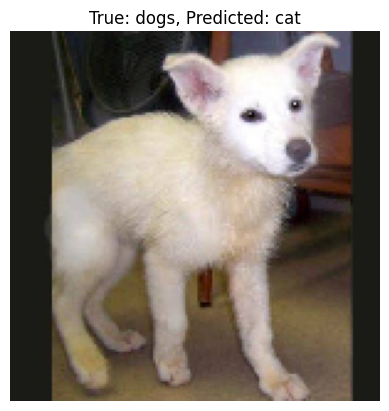

In [39]:
# Define a function to display an image with its label and prediction
def display_image_with_prediction(image_path, model, class_indices):
    # Load the image
    img = load_img(image_path, target_size=(150, 150))  # Resize to match model input
    img_array = img_to_array(img)                      # Convert to numpy array
    img_array = img_array / 255.0                      # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)      # Add batch dimension

    # Get the prediction
    prediction = model.predict(img_array)[0][0]        # Get predicted probability
    predicted_label = "dog" if prediction > 0.5 else "cat"  # Map probability to label

    # Determine the original label from the file path
    true_label = image_path.split('/')[-2]
    # Display the image with labels
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.show()

# Example usage
image_path = "/content/drive/MyDrive/CND/cats_and_dogs_filtered/train/dogs/dog.152.jpg"  # Replace with the path to a test image
display_image_with_prediction(image_path, model, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


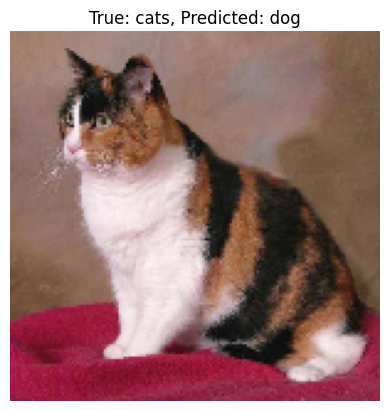

In [43]:
# Define a function to display an image with its label and prediction
def display_image_with_prediction(image_path, model, class_indices):
    # Load the image
    img = load_img(image_path, target_size=(150, 150))  # Resize to match model input
    img_array = img_to_array(img)                      # Convert to numpy array
    img_array = img_array / 255.0                      # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)      # Add batch dimension

    # Get the prediction
    prediction = model.predict(img_array)[0][0]        # Get predicted probability
    predicted_label = "cat" if prediction > 0.5 else "dog"  # Map probability to label

    # Determine the original label from the file path
    true_label = image_path.split('/')[-2]
    # Display the image with labels
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.show()

# Example usage
image_path = "/content/drive/MyDrive/CND/cats_and_dogs_filtered/train/cats/cat.78.jpg"  # Replace with the path to a test image
display_image_with_prediction(image_path, model, train_generator.class_indices)
